<a href="https://colab.research.google.com/github/nikhilkirtane/data-science-internship-at-codealpha/blob/main/CA_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE INTERNSHIP AT CODEALPHA

TASK 2- STOCK MARKET PREDICTION USING STACKED LSTM

AUTHOR- NIKHIL.S.KIRTANE

IMPORT PYTHON LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

IMPORT THE STOCK DATASET

In [8]:
 sdata = pd.read_csv("stockdata.csv")
 sdata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
sdata.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [12]:
sdata.shape

(2035, 8)

In [13]:
sdata.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [14]:
sdata.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

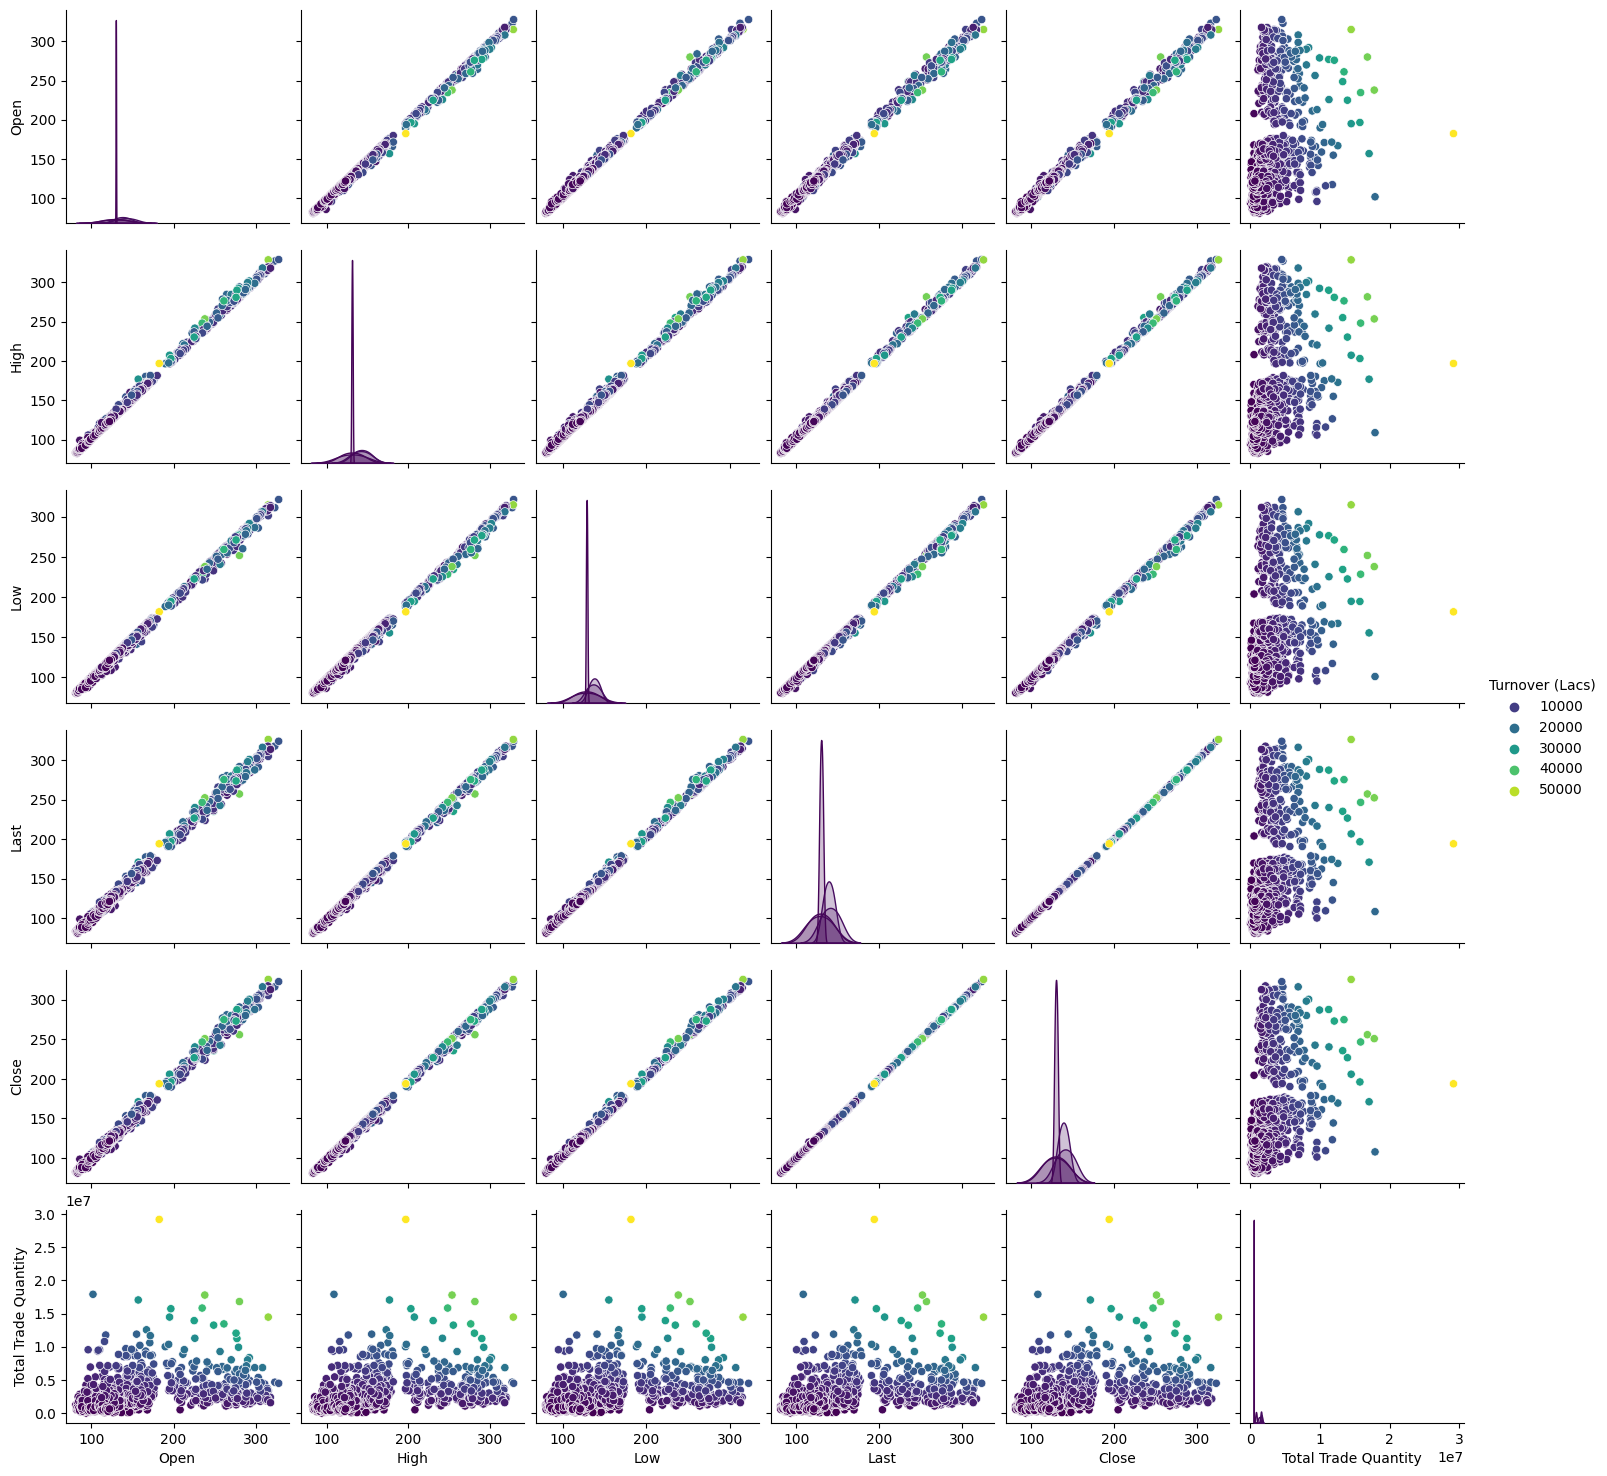

In [15]:
sns.pairplot(sdata, hue='Turnover (Lacs)', palette="viridis")
plt.show()

In [16]:
df_close=sdata.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

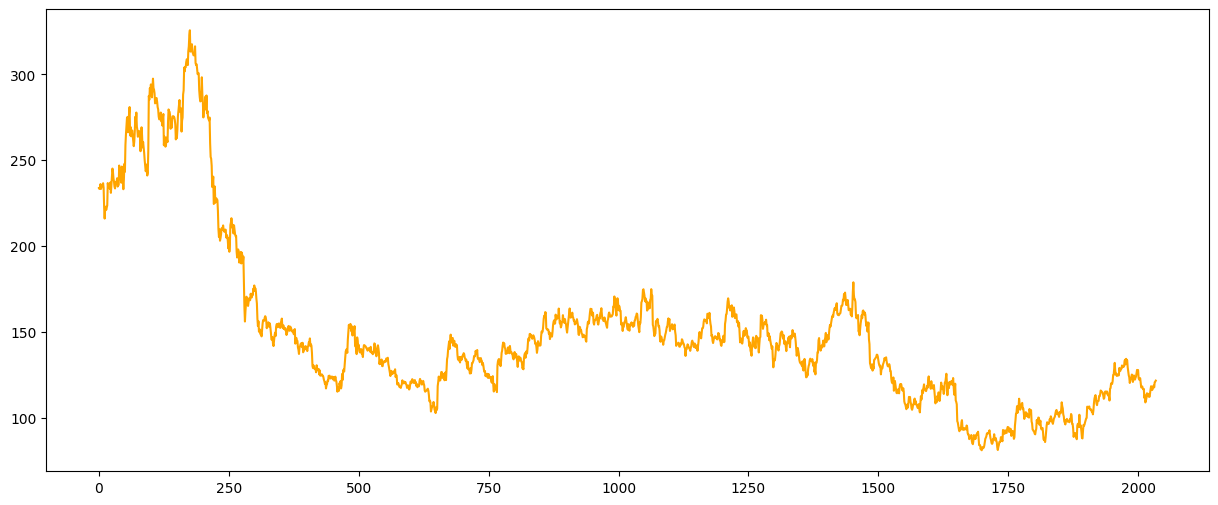

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df_close, c="orange")
plt.show()

In [18]:
df_high=sdata.reset_index()['High']
df_high

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

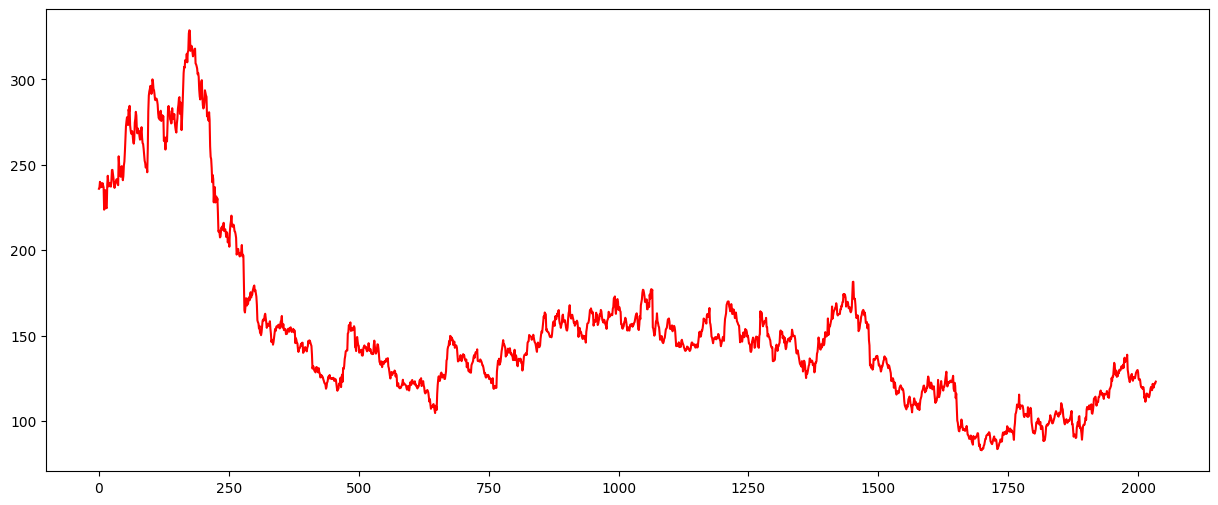

In [20]:
plt.figure(figsize=(15,6))
plt.plot(df_high, c="red")
plt.show()

In [21]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [22]:
df_high.shape

(2035, 1)

In [23]:
print(df_high)

[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


TRAINING AND TESTING OF STOCK DATASET

In [24]:
training_size = int(len(df_high) * 0.65)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [25]:
training_size,test_size

(1322, 713)

In [26]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [28]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
print(x_train.shape)
print(y_train.shape)

(1221, 100, 1)
(1221,)


In [30]:
print(x_test.shape)
print(y_test.shape)

(612, 100, 1)
(612,)


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

TO BUILD STACKED LSTM MODEL

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TRAIN THE STACKED LSTM MODEL

In [34]:
model.fit(x_train, y_train , validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 160ms/step - loss: 0.0272 - val_loss: 0.0037
Epoch 2/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 2s 109ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0014 - val_loss: 8.8357e-04
Epoch 7/100
20/20 [==============================] - 3s 132ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0014 - val_loss: 8.3285e-04
Epoch 9/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0013 - val_loss: 9.9865e-04
Epoch 10/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0

EVALUATE THE MODEL

In [35]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

20/20 [==============================] - 1s 39ms/step


In [36]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

166.7385439968537

In [40]:
math.sqrt(mean_squared_error(y_test, test_predict))

117.99487801998926

In [41]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

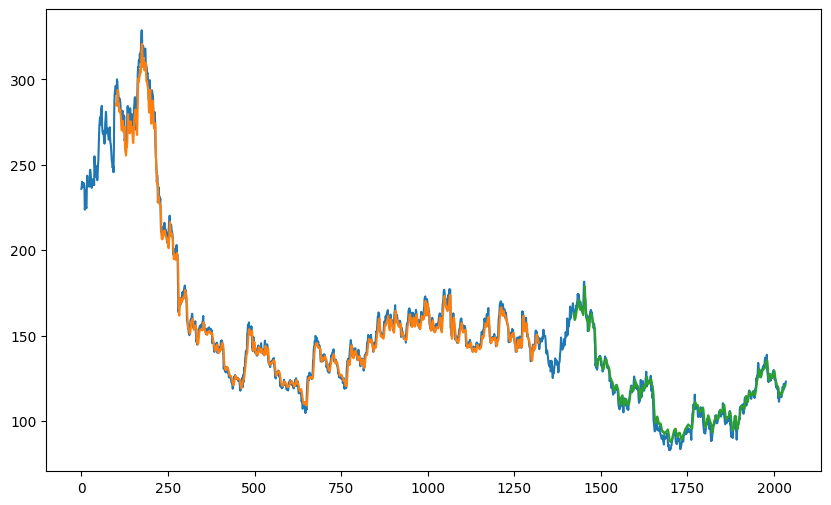

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [42]:
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [43]:
loss=model.evaluate(x_test,y_test)

20/20 [==============================] - 0s 22ms/step - loss: 2.3997e-04


In [47]:
predictions=model.predict(x_test)

20/20 [==============================] - 1s 39ms/step


In [49]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while i < nextNumberOfDays:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.1345802  0.13254727 0.13397032 0.13356373 0.13498679 0.14108559
 0.13498679 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778
 0.15003049 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546
 0.19129904 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727
 0.17483228 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892
 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832
 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766
 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923
 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426
 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959
 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012
 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049
 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553
 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469
 0.13295385 0.12807481 0.12624517 0.13051433 0.13905

In [50]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [52]:
print(day_new.shape)
print(day_pred.shape)

(100,)
(28,)


In [53]:
ds3 = df_high.tolist()
ds3.extend(lst_output)
len(df_high)

2035

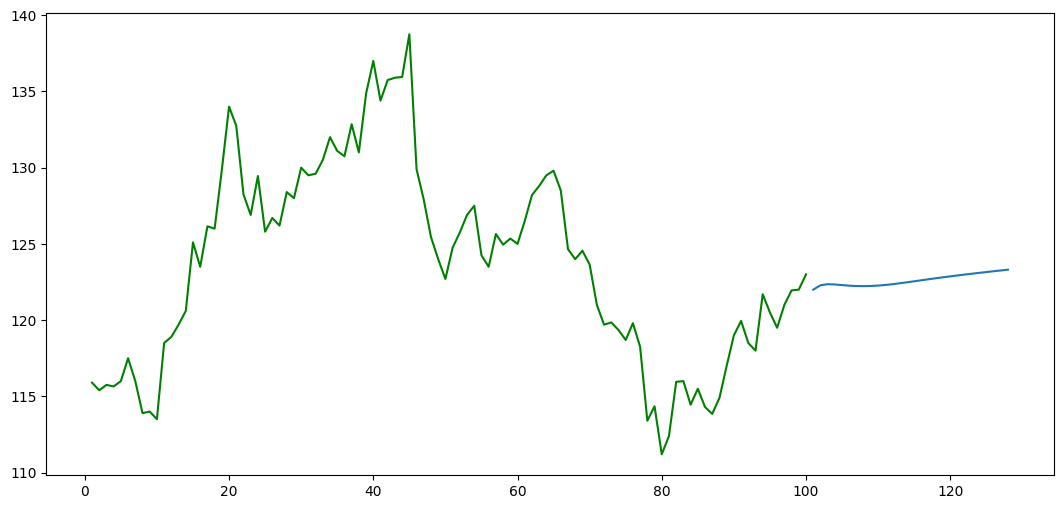

In [54]:
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]),color="Green")
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

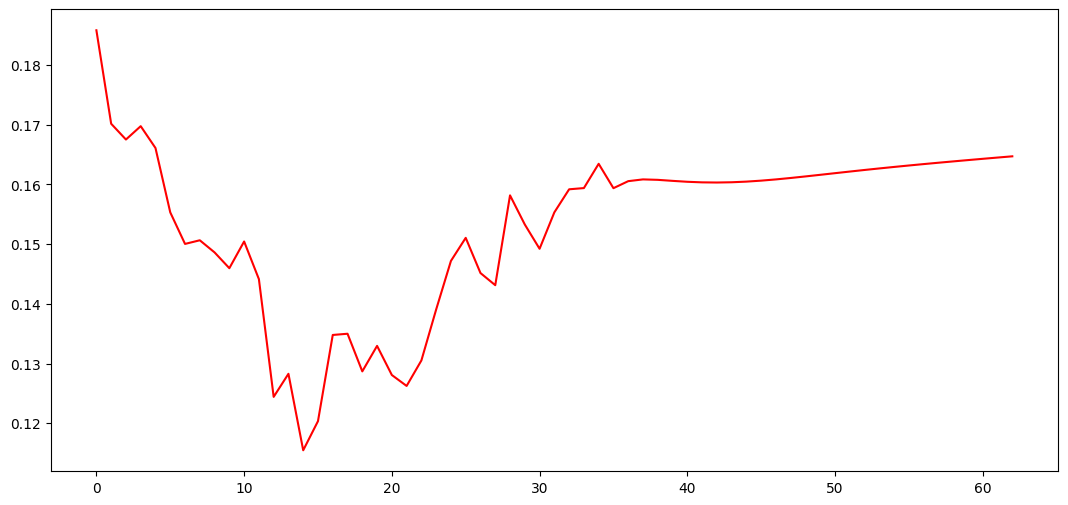

In [55]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:],color='Red')
plt.show()

INVERSE TRANSFORM THE THE PREDICTION AND ACTUAL VALUES

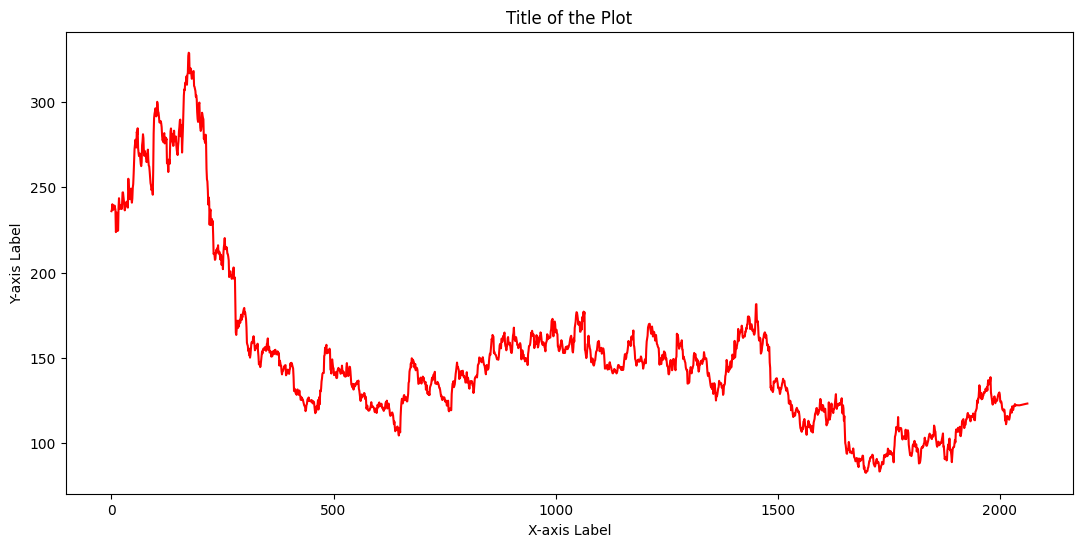

In [56]:
plt.figure(figsize=(13, 6))
ds3 = scaler.inverse_transform(ds3).tolist()
plt.plot(ds3, color='red')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()
